# Исследование надежности заемщиков


Во второй части проекта вы выполните шаги 3 и 4. Их вручную проверит ревьюер.
Чтобы вам не пришлось писать код заново для шагов 1 и 2, мы добавили авторские решения в ячейки с кодом. 



## Откройте таблицу и изучите общую информацию о данных

**Задание 1. Импортируйте библиотеку pandas. Считайте данные из csv-файла в датафрейм и сохраните в переменную `data`. Путь к файлу:**

`/datasets/data.csv`

In [1]:
import pandas as pd

try:
    data = pd.read_csv('/datasets/data.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/data.csv')

**Задание 2. Выведите первые 20 строчек датафрейма `data` на экран.**

In [2]:
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


**Задание 3. Выведите основную информацию о датафрейме с помощью метода `info()`.**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


## Предобработка данных

### Удаление пропусков

**Задание 4. Выведите количество пропущенных значений для каждого столбца. Используйте комбинацию двух методов.**

In [4]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

**Задание 5. В двух столбцах есть пропущенные значения. Один из них — `days_employed`. Пропуски в этом столбце вы обработаете на следующем этапе. Другой столбец с пропущенными значениями — `total_income` — хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому заполнить пропуски в этом столбце нужно медианным значением по каждому типу из столбца `income_type`. Например, у человека с типом занятости `сотрудник` пропуск в столбце `total_income` должен быть заполнен медианным доходом среди всех записей с тем же типом.**

In [5]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

### Обработка аномальных значений

**Задание 6. В данных могут встречаться артефакты (аномалии) — значения, которые не отражают действительность и появились по какой-то ошибке. таким артефактом будет отрицательное количество дней трудового стажа в столбце `days_employed`. Для реальных данных это нормально. Обработайте значения в этом столбце: замените все отрицательные значения положительными с помощью метода `abs()`.**

In [6]:
data['days_employed'] = data['days_employed'].abs()

**Задание 7. Для каждого типа занятости выведите медианное значение трудового стажа `days_employed` в днях.**

In [7]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, поэтому оставьте их как есть. Тем более этот столбец не понадобится вам для исследования.

**Задание 8. Выведите перечень уникальных значений столбца `children`.**

In [8]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5])

**Задание 9. В столбце `children` есть два аномальных значения. Удалите строки, в которых встречаются такие аномальные значения из датафрейма `data`.**

In [9]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

**Задание 10. Ещё раз выведите перечень уникальных значений столбца `children`, чтобы убедиться, что артефакты удалены.**

In [10]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5])

### Удаление пропусков (продолжение)

**Задание 11. Заполните пропуски в столбце `days_employed` медианными значениями по каждого типа занятости `income_type`.**

In [11]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

**Задание 12. Убедитесь, что все пропуски заполнены. Проверьте себя и ещё раз выведите количество пропущенных значений для каждого столбца с помощью двух методов.**

In [12]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Изменение типов данных

**Задание 13. Замените вещественный тип данных в столбце `total_income` на целочисленный с помощью метода `astype()`.**

In [13]:
data['total_income'] = data['total_income'].astype(int)

### Обработка дубликатов

**Задание 14. Обработайте неявные дубликаты в столбце `education`. В этом столбце есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв. Приведите их к нижнему регистру. Проверьте остальные столбцы.**

In [14]:
data['education'] = data['education'].str.lower()

**Задание 15. Выведите на экран количество строк-дубликатов в данных. Если такие строки присутствуют, удалите их.**

In [15]:
data.duplicated().sum()

71

In [16]:
data = data.drop_duplicates()

### Категоризация данных

**Задание 16. На основании диапазонов, указанных ниже, создайте в датафрейме `data` столбец `total_income_category` с категориями:**

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.


**Например, кредитополучателю с доходом 25000 нужно назначить категорию `'E'`, а клиенту, получающему 235000, — `'B'`. Используйте собственную функцию с именем `categorize_income()` и метод `apply()`.**

In [17]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [18]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

**Задание 17. Выведите на экран перечень уникальных целей взятия кредита из столбца `purpose`.**

In [19]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

**Задание 18. Создайте функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:**

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

**Например, если в столбце `purpose` находится подстрока `'на покупку автомобиля'`, то в столбце `purpose_category` должна появиться строка `'операции с автомобилем'`.**

**Используйте собственную функцию с именем `categorize_purpose()` и метод `apply()`. Изучите данные в столбце `purpose` и определите, какие подстроки помогут вам правильно определить категорию.**

In [20]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [21]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

### Шаг 3. Исследуйте данные и ответьте на вопросы

#### 3.1 Есть ли зависимость между количеством детей и возвратом кредита в срок?

,mean,count,sum
,debt,debt,debt
children,,,
0,0.075438,14091,1063
1,0.092346,4808,444
2,0.094542,2052,194
3,0.081818,330,27
4,0.097561,41,4
5,0.000000,9,0


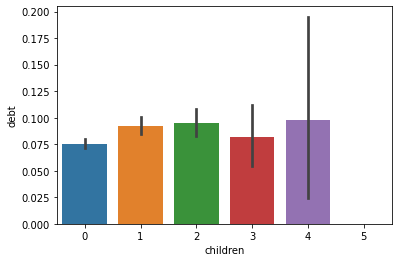

In [22]:
import seaborn as sb

data_children_ratio = data[['children', 'debt']]
sb.barplot(x='children', y='debt', data=data_children_ratio)

data.pivot_table(index=['children'], values=['debt'], aggfunc=['mean', 'count', 'sum'])

<div class="alert alert-success">
<h2> Комментарий ревьюера V1<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Правильно построила сводную таблицу, молодец!

**Вывод:** На основании гистограммы из полученных средних значений, можно сделать вывод, что между количеством детей и возвратом кредита в срок существует зависимость. Наиболее вероятно, что кредит будет погашен вовремя бездетным клиентом - 7,5% просроченных кредитов и клиентом с 3 детьми - 8,2% соответственно. Невыплаты кредитов семьями с одним, двумя и 4 детьми составляют от 9,2% до 9,8%. Данные о клиентах с 5-ю детьми не являются релевантными, исходя из того, что в датасете представлено всего лишь 9 таких случаев из 21525.

<div class="alert alert-success">
<h2> Комментарий ревьюера V1<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Верно, клиенты без детей реже допускают просрочки по кредитам. Что касается групп с 3, 4 и 5 детьми, то количество наблюдений в них недостаточно для корректного анализа.

#### 3.2 Есть ли зависимость между семейным положением и возвратом кредита в срок?

,mean,count,sum
,debt,debt,debt
family_status,,,
Не женат / не замужем,0.097639,2796,273
в разводе,0.070648,1189,84
вдовец / вдова,0.066246,951,63
гражданский брак,0.093130,4134,385
женат / замужем,0.075606,12261,927


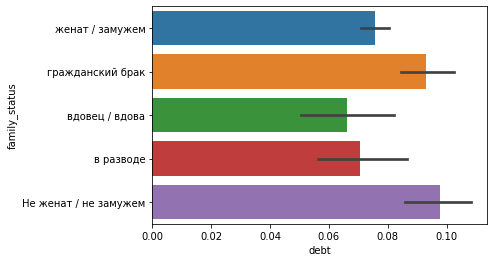

In [23]:
data_family_ratio = data[['family_status', 'debt']]
sb.barplot(x='debt', y='family_status', data=data_family_ratio)

data.pivot_table(index=['family_status'], values=['debt'], aggfunc=['mean', 'count', 'sum'])

<div class="alert alert-success">
<h2> Комментарий ревьюера V1<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Видно, что ты хорошо справляешься с построением сводных таблиц, так держать!

**Вывод:** Заметна связь между просроченными кредитами и семейным положением клиента. Иcходя из полученных данных, можно сказать, что наиболее вероятно кредит будет выплачен клиентами с семейным положением: "женат / замужем", "вдовец / вдова" и "в разводе". Наибольший риск невыплаты кредита представляют клиенты в гражданском браке - 9,3% и в категории "не женат / не замужем" - 9,8%. Можно заметить, что несмотря на то, что женатые клиенты берут больше всего кредитов, процент просрочек меньше и составляет около 7,1%.

<div class="alert alert-success">
<h2> Комментарий ревьюера V1<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Все верно, клиенты, побывавшие в браке, реже допускают просрочки по кредитам.

#### 3.3 Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

,mean,count,sum
,debt,debt,debt
total_income_category,,,
A,0.080000,25,2
B,0.070602,5014,354
C,0.084982,15921,1353
D,0.060172,349,21
E,0.090909,22,2


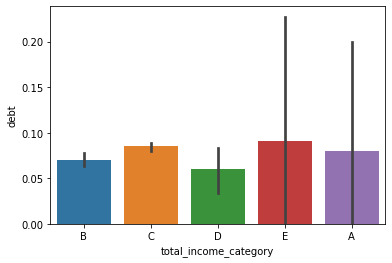

In [24]:
data_income_ratio = data[['total_income_category', 'debt']]
sb.barplot(x='total_income_category', y='debt', data=data_income_ratio)

data.pivot_table(index=['total_income_category'], values=['debt'], aggfunc=['mean', 'count', 'sum'])

**Вывод:** Можно заметить, что в датасете представлено слишком мало данных по категориям клиентов с доходами более одного миллиона рублей и менее 50 тысяч рублей. Для анализа можно использовать только клиентов с уровнем дохода в категории "С" (50001–200000 руб.) и в категории "В" (200001–1000000 руб.). В этих категориях клиенты с бОльшим доходом допускают меньше просрочек при выплате кредита - 7,1%, при меньшем доходе процент просрочек увеличивается - 8,5%.

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера V1<a class="tocSkip"></h2>


<b>На доработку🤔:</b>
Обрати внимание на распределение клиентов по группам. Можно ли учитывать все группы при выявлении зависимости?

Подсказка: зависимость нужно определять только по 2 группам с достаточным количеством клиентов.
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера V2<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Абсолютно верный вывод!

#### 3.4 Как разные цели кредита влияют на его возврат в срок?

,mean,count,sum
,debt,debt,debt
purpose_category,,,
операции с автомобилем,0.093480,4279,400
операции с недвижимостью,0.072551,10751,780
получение образования,0.092528,3988,369
проведение свадьбы,0.079118,2313,183


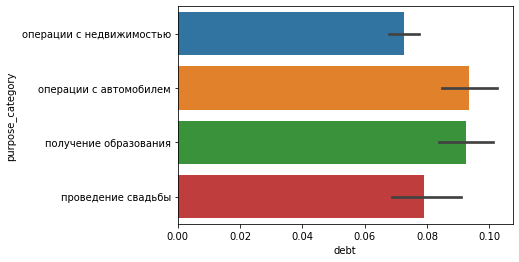

In [25]:
data_purpose_ratio = data[['purpose_category', 'debt']]
sb.barplot(x='debt', y='purpose_category', data=data_purpose_ratio)

data.pivot_table(index=['purpose_category'], values=['debt'], aggfunc=['mean', 'count', 'sum'])

**Вывод:** Больше всего процент невыплаты кредитов на оплату образования и операций с автомобилем - 9,3%. Риск невыплаты кредитов, взятых на проведение свадьбы и операций с недвижимостью меньше - 7,9% и 7,3% соответственно.

<div class="alert alert-success">
<h2> Комментарий ревьюера V1<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Все верно кредиты на недвижимость чаще выплачивают вовремя.

#### 3.5 Приведите возможные причины появления пропусков в исходных данных.

*Ответ:* Судя по тому, что данные пропущены в двух столбцах, связанных с доходами - "days_employed" и "total_income", а именно общий трудовой стаж в днях и размер ежемесячного дохода, можно предположить, что клиенты, обратившиеся в банк не предоставили справку с места работы или о доходах. Возможно, это пенсионеры или безработные.

<div class="alert alert-success">
<h2> Комментарий ревьюера V1<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Эти причины могут возникнуть в реальной жизни, согласен с тобой.

#### 3.6 Объясните, почему заполнить пропуски медианным значением — лучшее решение для количественных переменных.

*Ответ:* Заполнив пропуски медианными значениями мы сможем не исключать из набора данные и избежать искажений. Среднее в данном случае использовать некорректно, потому что при большом разбросе значений, оно не будет отражать действительное положение вещей.

<div class="alert alert-success">
<h2> Комментарий ревьюера V1<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Именно так, все верно.

### Шаг 4: общий вывод.

На основании анализа полученного датасета можно сделать несколько выводов.
1. Между количеством детей и возвратом кредита в срок существует зависимость. Наиболее вероятно, что кредит будет погашен вовремя бездетным клиентом - 7,5% просрочек. Процент просрочек выше, чем больше детей у клиента. У семей с одним ребёнком он 9,2%, с двумя детьми - 9,5%. Данных о семьях с бОльшим количеством детей недостаточно, чтобы сделать вывод.
2. Наибольший риск невыплаты кредита представляют клиенты в гражданском браке - 9,3% и в категории "не женат / не замужем" - 9,8%. Можно заметить, что несмотря на то, что женатые клиенты берут больше всего кредитов, процент просрочек меньше и составляет около 7,1%.
3. Цель кредита также влияет на риск невыплаты кредита. Выше всего он у клиентов, оформивших заём на оплату образования и операций с автомобилем - 9,3%. Риск невыплаты кредитов, взятых на проведение свадьбы и операций с недвижимостью меньше - 7,9% и 7,3% соответственно.
4. Несмотря на то, что данных о клиентах с доходами более одного миллиона рублей и менее 50 тысяч рублей недостаточно для проведения анализа, можно сделать вывод, что клиенты с бОльшим доходом допускают меньше просрочек при выплате кредита - 7,1% в категории "В" (200001–1000000 руб.). При меньшем доходе процент просрочек увеличивается - 8,5% в категории "С" (50001–200000 руб.).

<div class="alert alert-warning">
<h2> Комментарий ревьюера V1<a class="tocSkip"> </h2>

<b>Некоторые замечания и рекомендации💡:</b> В итоговом выводе нужно достаточно подробно написать основные пункты выявленных зависимостей. Стоит доработать вывод с учетом моих комментариев по ходу работы.

<div class="alert alert-success">
<h2> Комментарий ревьюера V2<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Отличный вывод, все четко, понятно и структурировано. Вывод в полной мере отражает существующие зависимости, и по нему можно принимать дальнейшие решения.
</div>

<div style="border:solid Chocolate 2px; padding: 40px">

**Общий вывод по проекту**

Спасибо за твой проект! Я уверен, что ты приложила все усилия, чтобы сделать этот проект. Это видно по твоей работе, а сформулированные выводы отражают, насколько успешно ты осваиваешь материал.

**Отмечу отдельные положительные моменты проекта🙂**:

* Ты полностью следовала всем этапам выполнения задания и справилась почти со всем. Хорошая работа!
* Отдельно выделю некоторые выводы, которые ты смогла сформулировать абсолютно точно!
* У тебя опрятный и читаемый код. Возможно это звучит банально, однако при работе с чужим кодом это крайне важно)


**На что стоит обратить внимание🤓**:

* Важно доработать итоговый вывод.
* Какая особенность данных не позволяет сходу дать ответ на вопрос: "Есть ли зависимость между уровнем дохода и возвратом кредита в срок?"
* Остальные рекомендации ты найдешь в моих комментариях!


**Желаю удачи и жду твой проект на повторное ревью!**😉

<div style="border:solid Chocolate 2px; padding: 40px">

Ты отлично справилась с данной работой! Видно, как ты успешно осваиваешь материал, применяешь полученные знания на практике. Мне было очень приятно проверять твою работу, надеюсь, мои комментарии и советы были для тебя полезными.

**Желаю удачи в последующем обучении и исследованиях!**😉